### Resources:

- https://github.com/Ejhfast/empath-client
- https://stackoverflow.com/questions/19258652/how-to-get-synonyms-from-nltk-wordnet-python
- https://medium.com/@pragadesh/semantic-similarity-using-wordnet-ontology-b12219943f23#:~:text=The%20main%20essence%20of%20this,them%20with%20their%20respective%20synonym.
- https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e
- https://www.kaggle.com/sreejiths0/efficient-tweet-preprocessing
- https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

- https://math.stackexchange.com/questions/278418/normalize-values-to-sum-1-but-keeping-their-weights
- https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
- https://github.com/cjhutto/vaderSentiment
- http://librarycarpentry.org/lc-tdm/09-frequency-distributions/index.html
- https://newbedev.com/how-to-calculate-the-sentence-similarity-using-word2vec-model-of-gensim-with-python

- https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/


### Papers:

- https://sci-hub.se/https://doi.org/10.1177/2066220317749140

In [3]:
import re
import nltk 
import string
import pprint
import pickle

import numpy as np
import pandas as pd
import preprocessor as p
from empath import Empath
from fuzzywuzzy import fuzz

from itertools import chain

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

from urlextract import URLExtract
from scipy.spatial import distance

from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

lemmatizer = WordNetLemmatizer()

from IPython.display import display_html 
from IPython.core.display import display, HTML

import tweepy
from tweepy import OAuthHandler

In [3]:
lexicon = Empath()

In [4]:
ERG22_Def = {'Need to redress grievance':['Victim of justice','rejection of democratic values', 'hostility to collective national identity', 
                                      'feelings of hate', 'frustration', 'persecution','alienation','anger'],
         'Need to defend against threat':['Feelings of hate and persecution'],
         
         'Need for identity, meaning & belonging, and comradeship':['Need for identity','Driven by comradeship, group belonging, status in group'],
         
         'Need for significance & status':['Need for significance and status','Driven by status in group, acquisition of status','Search for significance, meaning in life'],
         
         'Desire for excitement & adventure':['Desire for excitement & adventure', 'Driven by excitement & adventure'],
         
         'Need to dominate others':['Need to dominate others'],
         
         'Susceptibility to indoctrination':['Susceptibility to influence and indoctrination'],
         
         'Political, moral motivation':['Political, moral motivation','Driven by moral imperative and superiority by religion or noble cause'],
         
         'Opportunistic involvement':['Opportunistic involvement','Criminal Opportunism'],
         
         'Family/friends support extremism':['Family/friends support extremism','Network (family/friends) involved in violent action'],
         
         'Transitional periods':['Transitional periods'],
         
         'Group influence and control':['Group influence and control','Forced, coerced to participate susceptible to influence'],
         
         'Evaluated psychopathology':['Evaluated psychopathology'],
         
         'Over-identification':['Over-identification'],
         
         'Us and them thinking':['Us and them thinking','Hostility to national collective identity/identity conflict'],
         
         'Dehumanisation of the enemy':['Dehumanisation of the enemy','Dehumanisation/demonisation of target group'],
         
         'Attitudes that justify offending':['Attitudes that justify offending','Commitment to ideology justifying violence','glorification of violent action'],
         
         'Harmful means to an end':['Harmful means to an end','Willingness to die for cause'],
         
         'Harmful end objectives':['Harmful end objectives','Expressed intent to plan violent action', 'Expressed intent to act violently & to plan & prepare action',
                                   'Identification of a target','Lack of empathy for outgroups','Seeker/consumer/developer violent materials'],
         
         'Individual knowledge, skills & competencies':['Individual knowledge, skills and competencies','Tactical paramilitary explosives training'],
         
         'Access to networks, funding & equipment':['Access to networks, funding & equipment','Personal contact with extremists','funds, resources & organisational skills'],
         
         'Criminal history':['Criminal history','Prior criminal history of violence','Personal history: early exposure to violent extremism and ideology'],
         
         'Other factor':['lack of resilience','relational problems','lack of healthy father role model','desire to be a hero','hedonistic guilt',
                         'employment problems','previous trauma','failure to meet cultural or family expectations']
}

In [5]:
ERG22 = {'Need to redress grievance':['rejection', 'outrage', 'sorrow', 'hostility', 'frustration', 'victim', 'objection', 'persecution', 'anger', 
                                      'hardship', 'affliction', 'hate', 'alienation', 'injustice', 'resentment', 'unhappiness', 'grief', 'grievance'],
         
         'Need to defend against threat':['intimidation', 'hazard', 'safeguard', 'preserve', 'menace', 'persecution', 'prevent', 'secure',
                                          'fight for', 'protect', 'riskdefend', 'oppose', 'fight', 'shield', 'hold', 'blackmail', 'hate',
                                          'resist', 'guard', 'maintain', 'retain', 'contend', 'uphold', 'peril', 'threat', 'attack'],
         
         'Need for identity, meaning & belonging, and comradeship':['loyalty', 'attachment', 'acceptance', 'kinship', 'affinity', 'meaning',
                                                                    'camaraderie', 'rapport', 'closeness', 'inclusion', 'fellowship', 'identity',
                                                                    'brotherhood', 'status in group', 'relationship', 'comradeship', 'belonging',
                                                                    'companionship', 'association', 'chumminess'],
         
         'Need for significance and status':['status', 'significance', 'acquisition', 'meaning'],
         
         'Desire for excitement & adventure':['excitement', 'adventure', 'buzz', 'commotion', 'confusion', 'drama', 'elation', 'emotion', 'feeling', 
                                              'frenzy', 'furor', 'fuss', 'hysteria', 'motivation', 'passion', 'rage', 'thrill', 'trepidation', 'tumult', 
                                              'turmoil', 'warmth'],
         
         'Need to dominate others':['dominate', 'command', 'control', 'dictate', 'influence', 'lead', 'manage', 'monopolize', 'overshadow', 'prevail', 'run',
                                   'follow', 'lose', 'obey', 'mismanage', 'neglect', 'submit', 'be below', 'go along', 'surrender', 'yield'],
         
         'Susceptibility to indoctrination':['susceptibility', 'awareness', 'perceptivity', 'sensitivity', 'susceptiveness', 'susceptivity', 
                                             'indoctrination', 'persuasion', 'brainwashing', 'instruction', 'training'],     
         
         'Political, moral motivation':['political', 'moral', 'imperative', 'superiority', 'religion', 'political', 'cause','noble cause', 'motive'],
         
         'Opportunistic involvement':['opportunism', 'chance', 'opportunity', 'involvement','involve', 'involving'],
         
         'Family/friends support extremism':['network', 'family', 'friends', 'support', 'extremism', 'extrimist','violent action'],
         
         'Transitional periods':['difficult', 'dry', 'hard', 'difficult period', 'dry period'],
         
         'Group influence and control':['forced', 'coerced', 'participate', 'susceptible', 'influence','susceptible influence'],
         
         'Evaluated psychopathology':['insanity', 'mental disorder', 'personality disorder', 'schizophrenia', 'craziness', 'delusions', 
                                      'depression', 'derangement', 'disturbed mind', 'emotional disorder', 'emotional instability', 
                                      'loss of mind', 'lunacy', 'madness', 'maladjustment', 'mania', 'mental disease', 'mental sickness', 
                                      'nervous breakdown', 'nervous disorder', 'neurosis', 'neurotic disorder', 'paranoia', 'phobia', 
                                      'psychopathy', 'psychosis', 'sick mind', 'troubled mind', 'unbalanced mind', 'unsoundness of mind'],
         'Over-identification':[''],
         
         'Us and them thinking':['us', 'them', 'our', 'their', 'others', 'outgroups', 'hostility', 'collective identity', 'identity conflict'
                                 'aggression', 'animosity', 'antipathy'],
         
         'Dehumanisation of the enemy':['animalize', 'bestialize', 'brutalize', 'dehumanisation', 'demonisation', 'target', 'target group', 
                                        'demonisation of target group'],
         
         'Attitudes that justify offending':['attitude', 'behaviour', 'ideology','commitment', 'glorification'],
         
         'Harmful means to an end':['harm', 'pain','end', 'die', 'suicide', 'cause', 'die for cause', 'adverse', 'bad', 'baleful', 
                                    'baneful', 'damaging', 'dangerous', 'deleterious', 'detrimental', 'evil', 'hurtful', 'ill', 
                                    'injurious', 'mischievous', 'nocuous', 'noxious', 'pernicious', 'prejudicial', 'wicked'],
         
         'Harmful end objectives':['harm', 'pain', 'objective', 'goal', 'intention', 'plan', 'expressed intent', 'prepare action', 'target', 
                                   'empathy', 'merciless', 'brutal', 'aggressive', 'cutthroat', 'fierce', 'ruthless', 'unmerciful'],
         
         'Individual knowledge, skills and competencies':['skill', 'knowledge', 'competencies', 'tactics', 'explosives', 'paramilitary','military', 'training'],
         
         'Access to networks, funding & equipment':['network', 'access', 'funding', 'equipment', 'contact', 'extrimist','funds', 'resources', 'materials', 
                                                    'tools', 'organisational skills'],
         
         'Criminal history':['theft', 'fighting', 'rampage', 'confusion', 'exposure', 'community service', 'assault', 'cruelty', 'brutality', 'guilty',
                             'jail', 'crime', 'terrorism', 'murder', 'punishment', 'prison', 'violence', 'disorder', 'deterrence', 'retributionprotedt',
                             'judje', 'revenge', 'probation', 'attack', 'jury', 'criminal', 'clash', 'reformation', 'justice', 'struggle', 'disturbance',
                             'bloodshed', 'history', 'case', 'lawyer', 'kill', 'assassinate', 'drown', 'execute', 'get', 'hit', 'massacre', 'poison', 'slaughter', 
                             'slay', 'wipe out', 'annihilate', 'asphyxiate', 'crucify', 'electrocute', 'eradicate', 'erase', 'exterminate', 'extirpate', 
                             'garrote', 'hang', 'immolate', 'liquidate', 'lynch', 'obliterate', 'sacrifice', 'strangle', 'suffocate', 'waste'],
         
         'Other factor':['fearless', 'poor job fit', 'torture', 'breakdown', 'overtime laws', 'parsimonious', 'discrimination', 'grand',
                         'depression', 'suffering', 'gutsy', 'sin', 'derangement', 'communication issues', 'good example', 'stiff', 'epicurean',
                         'traumatization', 'noble', 'hero', 'gossip', 'exemplar', 'voluptuous', 'insolence', 'weakness', 'problem', 'fail', 'ex-wife', 'paragon', 
                         'deterioration', 'heroine', 'hedonic', 'incivility', 'culpability', 'failing', 'boldness', 'hard', 'dishonor', 'stigma',
                         'delicate', 'weak', 'valiant', 'impoliteness', 'bankruptcy', 'indiscretion', 'fragility', 'outburst', 'shock', 'disturbance',
                         'vulnerability', 'example', 'confusion', 'regret', 'impertinence', 'shame', 'miserly', 'misstep', 'superstar',
                         'unmannerliness', 'contempt', 'effete', 'wound', 'trauma', 'liability', 'disgrace', 'irreverence', 'bold', 'epic', 'guilt', 'hedonistic',
                         'decadent', 'defeat', 'jolt', 'role model', 'hardihood', 'failure', 'mentor', 'insolency', 'agony', 'inflexible', 'daring', 'responsibility',
                         'blow', 'remorse', 'upset', 'epitome', 'voluptuary', 'rigidity', 'strain', 'discourtesy', 'idol', 'impudence',
                         'sacrilege', 'damage', 'decline', 'upheaval', 'insolentness', 'stress', 'injury', 'shining example', 'collapse', 'loss',
                         'impiety', 'hurt', 'rigid', 'flippancy', 'greed', 'deficiency', 'coarseness', 'low motivation', 'courageous', 'anguish', 'ex-girlfriend', 
                         'ordeal', 'gallant']
}

- Make list of Keywords and Expand them to matxh them with expanded keywords i the empath package

### First Part:
- Expand Keywords of Empath
- Build keywords from ERG22
- Map Empath categories to ERG22 to build new Dictionary ERG22_Empath

In [6]:
def get_all_word_synonyms(word):
    word = word.lower()
    synonyms = []
    synsets = wn.synsets(word)
    if (len(synsets) == 0):
        return []
    for synset in synsets:
        lemma_names = synset.lemma_names()
        for lemma_name in lemma_names:
            lemma_name = lemma_name.lower().replace('_', ' ')
            if (lemma_name not in synonyms):
                synonyms.append(lemma_name)
    return synonyms

def Expand_Keywords(Dict):
    new_Dict = {}
    for key in Dict.keys():
        synonyms = []
        for word in Dict[key]:
            synonyms.extend(get_all_word_synonyms(word))
        new_Dict[key] = synonyms
    return new_Dict

def Load_Empath_Categories():
    Categories = {}
    with open('Categories.tsv',"r") as f:
         for line in f:
            cols = line.strip().split("\t")
            Categories[cols[0]] = cols[1:]
    return Categories

def Percentage_overlap(actual, predicted, threshold = 0.9):
    overlap = []
    if len(actual) == 0:
        return 0
    for pre in predicted:
        for act in actual:
            sim = 0
            x = wn.synsets(pre)
            y = wn.synsets(act)
            if x and y:
                sim = x[0].wup_similarity(y[0])
                if sim != None and sim > 0.5:
                    overlap.append(act.lower()) 
            else:
                if (fuzz.ratio(pre.lower(),act.lower()) > threshold):
                #if (fuzz.partial_ratio(pre.lower(),act.lower()) > threshold):
                    overlap.append(act.lower())
    return len(list(set(overlap)))
    #return round(len(list(set(overlap)))*100/len(actual), 2)

def Map_ERG22_Empath(ERG22, Categories):
    ERG22_Empath = {}
    for key in ERG22.keys():
        print(key)
        Empath_prop = {}
        for cat in Categories.keys():
            Empath_prop[cat] = Percentage_overlap(ERG22[key], Categories[cat])
        ERG22_Empath[key] = Empath_prop
    
    with open('ERG22_Empath.pkl', 'wb') as handle:
         pickle.dump(ERG22_Empath, handle)

    return ERG22_Empath

def Normalize():
    with open('ERG22_Empath.pkl', 'rb') as handle:
        ERG22_Empath2 = pickle.load(handle)
    for factor in ERG22_Empath2.keys():
        total = float(sum(ERG22_Empath2[factor].values()))
        if total > 0:
            normalizer = 1/total
        else:
            normalizer = 0
        for cat in ERG22_Empath2[factor].keys():
            ERG22_Empath2[factor][cat] = round(ERG22_Empath2[factor][cat] * normalizer, 4)
    return ERG22_Empath2

In [ ]:
Categories = Load_Empath_Categories()

#Categories = Expand_Keywords(Categories)
#ERG22 = Expand_Keywords(ERG22)

ERG22_Empath = Map_ERG22_Empath(ERG22, Categories)

Need to redress grievance


- Use the scores to Count the Total Risk

### Loading and processing data source:
- Load tweets
- Preprocessing

In [7]:
def Extract_Numbers(string, ints=True):            
    numexp = re.compile(r'\d[\d,]*[\.]?[\d{2}]* ?')
    numbers = numexp.findall(string)
    numbers = [x.strip(' ') for x in numbers]

    return numbers
#____________________________________________________________________

def Extract_URLs(sentence):
    extractor = URLExtract()
    urls = extractor.find_urls(sentence)
    return list(set(urls))
#____________________________________________________________________

def Extract_emails(sentence):
    regex = re.compile(("([a-z0-9!#$%&'*+\/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+\/=?^_`"
                    "{|}~-]+)*(@|\sat\s)(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?(\.|"
                    "\sdot\s))+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?)"))

    emails = re.findall(r'[\w\.-]+@[\w\.-]+', sentence)
    return list(set(emails))
#____________________________________________________________________

def List_Punctuations(text):
    text = re.sub('[A-Za-z]|[0-9]|[\n]','',text)
    SymbList = list(dict.fromkeys(text).keys())
    return list(set(SymbList))

def preprocessing_tweets(text, Punctuations, Urls, Emails, Numbers):
    text = text.replace('ENGLISH TRANSLATION:', '')
    text = text.replace('ENGLISH TRANSCRIPT :', '')
    text = p.clean(text)

    #punctuation
    for Punctuation in Punctuations:
        text = text.replace(Punctuation,' ')
    #Urls
    for Url in Urls:
        if Url in text:
            text = Text.replace(Url,' ')  
    #Emails
    for Email in Emails:
        if Email in text:
            text = text.replace(Email, ' ')
    #Punctuations
    for Punctuation in Punctuations:
        text = text.replace(Punctuation,' ')
    
    text = re.sub(r"\S*\d\S*", ' ', text)

    #text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    #stopwords
    
    stopword = nltk.corpus.stopwords.words('english')
    text = ' '.join([word for word in text.lower().split() if word not in stopword])
    
    text = text.replace('[^\w\s]','').replace('\s\s+', ' ')
    
    #steming
    #ps = nltk.PorterStemmer()
    #text = [ps.stem(word) for word in text.split()]
    if text == ' ' or text == '':
        text = np.nan
    return text

## Threat Corpus and Pro-ISIS

In [8]:
with open('VideoCommentsThreatCorpus.txt', 'r', encoding="utf-8") as handle:
     Lines = handle.readlines()

Video, Comment, Commenter = 0, 0, 0
Time = ''
Data = []
for line in Lines:
    if line != '\n':
        if 'Video #' in line:
            items = line.split(',')
            Video = int(items[0][7:])
            Comment = int(items[1][10:])
            Commenter = int(items[2][12:])
            Time = items[3][1:].strip()
        else:
            items = line.split('\t')
            Label = int(items[0])
            Text = items[1]
            Data.append([Video, Comment, Commenter, Time, Text, Label])#, 0, 0, 0

Threat = pd.DataFrame(Data, columns=['Video', 'Comment', 'Commenter', 'Time', 'Texts', 'Labels'])#, 'Risk_keywords', 'Risk_Empath', 'Risk_BERT'

Punctuations = List_Punctuations(' '.join(Threat['Texts'].tolist()))
Urls = Extract_URLs(' '.join(Threat['Texts'].tolist()))
Emails = Extract_emails(' '.join(Threat['Texts'].tolist()))
Numbers = Extract_Numbers(' '.join(Threat['Texts'].tolist()))

Threat['Texts'] = Threat['Texts'].apply(lambda text: preprocessing_tweets(text, Punctuations, Urls, Emails, Numbers))
Threat.dropna(subset = ["Texts"], inplace=True)
Threat = Threat[['Texts', 'Labels']]
Threat

,Texts,Labels
0,europeans want change way life customs makes e...,0
1,muslims want assimilate properly european soci...,0
2,ok europe soon rebel like spain drive killed,1
3,forsee big civil war europe future muslims lea...,0
4,islam simple humanitarian attractive religion,0
...,...,...
28638,yeah monsters gonna kill u right,1
28639,stupid brainwashed idiot,0
28640,ever serbia kosovo fucking idiot u know shit,0
28641,probably u mean monsters fucker watch v jc,0


In [9]:
df_isis = pd.read_excel('tweets.xlsx', sheet_name = 'DATA')
df_isis = df_isis[['username', 'tweets']]
df_isis.dropna(subset = ['username', 'tweets'], inplace=True)

Punctuations = List_Punctuations(' '.join(df_isis['tweets'].tolist()))
Urls = Extract_URLs(' '.join(df_isis['tweets'].tolist()))
Emails = Extract_emails(' '.join(df_isis['tweets'].tolist()))
Numbers = Extract_Numbers(' '.join(df_isis['tweets'].tolist()))
df_isis['tweets'] = df_isis['tweets'].apply(lambda text: preprocessing_tweets(text, Punctuations, Urls, Emails, Numbers))
df_isis

,username,tweets
0,GunsandCoffee70,message truthful syria sheikh abu muhammed al ...
1,GunsandCoffee70,sheikh fatih al jawlani people integrity sacri...
2,GunsandCoffee70,first audio meeting sheikh fatih al jawlani ha
3,GunsandCoffee70,sheikh nasir al wuhayshi ha leader aqap promis...
4,GunsandCoffee70,aqap response sheikh baghdadis statement altho...
...,...,...
17405,nvor85j,NaN
17406,nvor85j,iraqi forces bulldozer destroyed guided missil...
17407,nvor85j,NaN
17408,nvor85j,conduct battles inyarmouk camp


In [10]:
df_isis.dropna(subset = ['username', 'tweets'], inplace=True)

users = list(set(df_isis['username'].tolist()))
tweets = []
for user in users:
    tweets.append(' '.join(df_isis[df_isis.username == user]['tweets'].tolist()))

df_users = pd.DataFrame(columns=['username', 'tweets'])
df_users['username'] = users
df_users['tweets'] = tweets

df_users

,username,tweets
0,AbuNaseeha_03,million dollars distributed diwan zakah syria ...
1,Jazrawi_Saraqib,ahrar alsharqiya alqaeda group led galaxy appr...
2,st3erer,sources soldier commando unit killed abu sheit...
3,JoinISNation102,may allah reward jannah shaallah massagers vic...
4,maisaraghereeb,huge cuts diplomatic ties huge gives ambassado...
...,...,...
106,nvor85j,jazakallah khairan akhi martyrdom op w xplosiv...
107,WarReporter1,retreat around ras al exhausted fighters elsew...
108,NaseemAhmed50,week managed get closer count number written b...
109,_IshfaqAhmad,game come ellyse perry beauty ellyse perry rou...


### Empath Feature space

In [11]:
def Get_Empath(df, col, name):
    Empath = []
    #lexicon = Empath()
    for text in df[col].tolist(): 
        Empath.append(list(lexicon.analyze(text, normalize=True).values()))
    
    with open('Empath/'+name+'_Empath.pkl', 'wb') as handle:
         pickle.dump(Empath, handle)
    return Empath

def Get_ERG_DEF_empath(Vector=True):
    ERG_Empath = {}
    for factor in ERG22_Def.keys():
        if Vector:
            ERG_Empath[factor] = list(lexicon.analyze(' '.join(ERG22_Def[factor]), normalize=True).values())
        else:
            ERG_Empath[factor] = [list(lexicon.analyze(Def, normalize=True).values()) for Def in ERG22_Def[factor]]
    if Vector:
        with open('Empath/Vector_ERG_DEF_Empath.pkl', 'wb') as handle:
             pickle.dump(ERG_Empath, handle)
    else:
        with open('Empath/Matrix_ERG_DEF_Empath.pkl', 'wb') as handle:
             pickle.dump(ERG_Empath, handle)
    return ERG_Empath

def ERG23_Empath_vs_Threats_Empath(Vector=True):
    if Vector:
        with open('Empath/Vector_ERG_DEF_Empath.pkl', 'rb') as handle:
             ERG23_Empath = pickle.load(handle)
    else:
        with open('Empath/Matrix_ERG_DEF_Empath.pkl', 'rb') as handle:
             ERG23_Empath = pickle.load(handle)  
    
    with open('Threats_Empath.pkl', 'rb') as handle:
        Threats_Empath = pickle.load(handle)

    Threats_ERG23_Risk = []
    for TE in Threats_Empath:
        ERG23_Risk = dict.fromkeys(ERG23_Empath.keys(), 0)
        for factor in ERG23_Empath.keys():
            if Vector:
                sim = round(1-distance.cosine(TE, ERG23_Empath[factor]), 2)
            else:
                sim = max([(1-distance.cosine(TE, Vec)) for Vec in ERG23_Empath[factor]])
            if not np.isnan(sim):
                ERG23_Risk[factor] = sim
        Threats_ERG23_Risk.append(max(ERG23_Risk.values()))
        #Threats_ERG23_Risk.append(round(sum(ERG23_Risk.values())/23, 2))
    return Threats_ERG23_Risk

def ERG23_Empath_vs_tweets_Empath(Vector=True):
    #ERG23_Empath = Normalize()

    if Vector:
        with open('Empath/Vector_ERG_DEF_Empath.pkl', 'rb') as handle:
             ERG23_Empath = pickle.load(handle)
    else:
        with open('Empath/Matrix_ERG_DEF_Empath.pkl', 'rb') as handle:
             ERG23_Empath = pickle.load(handle)
                
    with open('Tweets_Empath.pkl', 'rb') as handle:
        Tweets_Empath = pickle.load(handle)

    Tweets_ERG23_Risk = []
    for TE in Tweets_Empath:
        ERG23_Risk = dict.fromkeys(ERG23_Empath.keys(), 0)
        
        for factor in ERG23_Empath.keys():
            if Vector:
                sim = round(1-distance.cosine(TE, ERG23_Empath[factor]), 2)
            else:
                sim = max([(1-distance.cosine(TE, Vec)) for Vec in ERG23_Empath[factor]])
            if not np.isnan(sim):
                ERG23_Risk[factor] = sim
        Tweets_ERG23_Risk.append(max(ERG23_Risk.values()))
        #Tweets_ERG23_Risk.append(sum(ERG23_Risk.values()))
        #Tweets_ERG23_Risk.append(round(sum(ERG23_Risk.values())/23, 2))
    return Tweets_ERG23_Risk

In [121]:
#EDE = Get_ERG_DEF_empath()
#EDE = Get_ERG_DEF_empath(Vector=False)

In [ ]:
Threats_Empath = Get_Empath(Threat, 'Texts', 'Threats')
Tweets_Empath = Get_Empath(df_isis, 'tweets', 'Tweets')
Users_Empath = Get_Empath(df_users, 'tweets', 'Users')

### Labeling tweets using Youtube Threat Corpus

In [8]:
def Labeling_Tweets(df):
    consumer_key = 'nrAyZFb8qLQA5vAD0qp9HWwqk'
    consumer_secret = 'DAXSROuPnYJaX1lSBcgugTocFjVRkFkcKHaXF5EiH2KLR8Btud'
    access_key = '2931812891-sz3VGZtEH9NQA2qXDBiBXaa9OizzlpGKjm3c428'
    access_secret = 'kZqrskwtgWWltGRDcU01DncGLUBuNKp8oG7EA9IbrQQ1Y'
   
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    users = df['username'].tolist()
    Labels = [1]*len(df['username'].tolist())
    for i,x in enumerate(users):
        try:
            u=api.get_user(x)
            print (u.id_str)
            print (u.screen_name)
            Labels[i] = 0
        except tweepy.TweepError as e:
               #print(x, 'does not exists')
                pass
    return Labels

def Labeling_Tweets_Youtube(Labels, Threshold = 0.5):
    with open('Empath/Users_Empath.pkl', 'rb') as handle:
        Tweets_Empath = pickle.load(handle)
    with open('Empath/Threats_Empath.pkl', 'rb') as handle:
        Threats_Empath = pickle.load(handle)

    Sim_Threats_Tweets = []
    for TW in Tweets_Empath:
        sims = []
        for TE in Threats_Empath:
            sim = round(1-distance.cosine(TE, TW), 2)
            if np.isnan(sim):
                sim = 0
            sims.append(sim)
        if sum(sims) == 0 or max(sims) < Threshold:
            Sim_Threats_Tweets.append(0)
        else:
            Sim_Threats_Tweets.append(Labels[sims.index(max(sims))])
    return Sim_Threats_Tweets

#df_users['YLabels'] = Labeling_Tweets_Youtube(Threat['Labels'].tolist(), Threshold = 0.5)
#df_users['TLabels'] = Labeling_Tweets(df_users)

In [84]:
#df_users.to_csv('Twitter_users.csv', index=False, header=True)

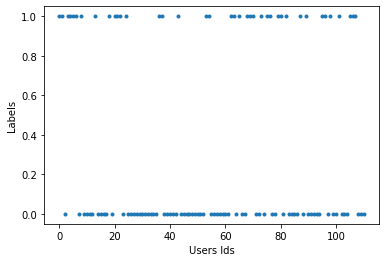

In [20]:
indexes = np.arange(len(df_users['YLabels'].tolist()))
#plt.bar(indexes, df_users['YLabels'].tolist())
plt.scatter(indexes, df_users['YLabels'].tolist(), marker=".")
plt.xlabel('Users Ids')
plt.ylabel('Labels')
plt.savefig('YLabels.eps', format='eps')

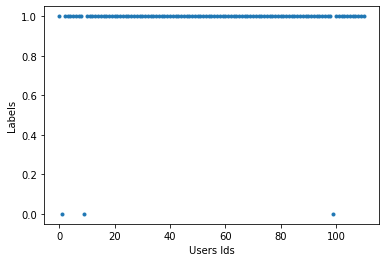

In [21]:
indexes = np.arange(len(df_users['TLabels'].tolist()))
#plt.bar(indexes, df_users['TLabels'].tolist())
plt.scatter(indexes, df_users['TLabels'].tolist(), marker=".")
plt.xlabel('Users Ids')
plt.ylabel('Labels')
plt.savefig('TLabels.eps', format='eps')

### Keywords Matching

In [219]:
def Keywords_Matching_ERG22(df, col, name):
    ERG22E = Expand_Keywords(ERG22)
    
    Matched_ERG22 = []
    for text in df[col].tolist():
        text_ERG22 = dict.fromkeys(ERG22E.keys(), 0)
        for factor in ERG22E.keys():
            intersect = len(list(set(text.split()).intersection(set(ERG22[factor]))))
            #text_ERG22[factor] = intersect
            #if intersect >= 3:
            #    text_ERG22[factor] = 1
            text_ERG22[factor] = round(intersect/len(text.split()), 4)
        Matched_ERG22.append(max(text_ERG22.values()))
        #Matched_ERG22.append(round(sum(text_ERG22.values())/23., 4))
        #Matched_ERG22.append(sum(text_ERG22.values()))

    with open('Keywords/'+name+'_Keywords_Matching_ERG22.pkl', 'wb') as handle:
         pickle.dump(Matched_ERG22, handle)
    return Matched_ERG22

Threat['keywordRisk'] = Keywords_Matching_ERG22(Threat, 'Texts', 'Threats')
df_users['keywordRisk'] = Keywords_Matching_ERG22(df_users, 'tweets', 'Users')

In [23]:
Threat

,Texts,Labels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
0,europeans want change way life customs makes e...,0,0.0000,0.32,0.408248,0.98,0.015343
1,muslims want assimilate properly european soci...,0,0.0000,0.29,0.333333,0.98,0.021377
2,ok europe soon rebel like spain drive killed,1,0.0000,0.46,0.455842,0.98,0.001933
3,forsee big civil war europe future muslims lea...,0,0.0000,0.28,0.288675,0.98,0.006280
4,islam simple humanitarian attractive religion,0,0.2000,0.61,0.617213,0.98,0.005913
...,...,...,...,...,...,...,...
28512,yeah monsters gonna kill u right,1,0.1667,0.43,0.416025,0.97,0.002288
28513,stupid brainwashed idiot,0,0.0000,0.41,0.707107,0.98,0.006399
28514,ever serbia kosovo fucking idiot u know shit,0,0.0000,0.41,0.707107,0.97,0.006776
28515,probably u mean monsters fucker watch v jc,0,0.0000,0.52,0.577350,0.98,0.010295


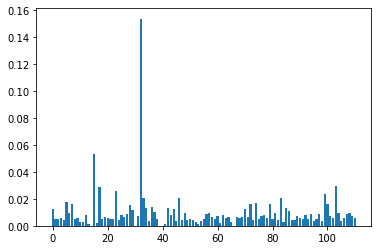

In [29]:
indexes = np.arange(len(df_users['keywordRisk'].tolist()))
plt.bar(indexes, df_users['keywordRisk'].tolist())
#plt.savefig('TkeywordRisk.eps', format='eps')
plt.savefig('TkeywordRisk.png')

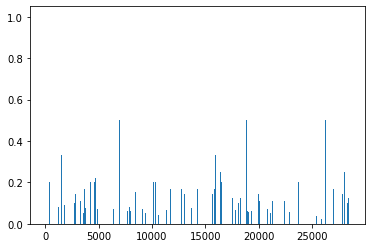

In [28]:
indexes = np.arange(len(Threat['keywordRisk'].tolist()))
plt.bar(indexes, Threat['keywordRisk'].tolist())
#plt.savefig('YkeywordRisk.eps', format='eps')
plt.savefig('YkeywordRisk.png')

### Definitions as Single Vector and Matrix

#### Twitter

In [225]:
df_users['Vec_Risk_Empath'] = ERG23_Empath_vs_tweets_Empath()
df_users['Mat_Risk_Empath'] = ERG23_Empath_vs_tweets_Empath(Vector=False)

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\scipy\spatial\distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


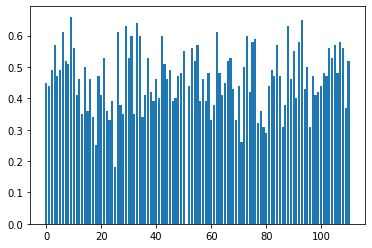

In [226]:
indexes = np.arange(len(df_users['Vec_Risk_Empath'].tolist()))
plt.bar(indexes, df_users['Vec_Risk_Empath'].tolist())
#plt.savefig('TVec_Risk_Empath.eps', format='eps')
plt.savefig('TVec_Risk_Empath.png')

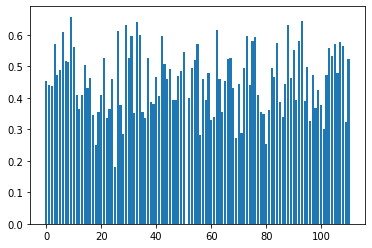

In [227]:
indexes = np.arange(len(df_users['Mat_Risk_Empath'].tolist()))
plt.bar(indexes, df_users['Mat_Risk_Empath'].tolist())
plt.savefig('TMat_Risk_Empath.eps', format='eps')

#### Threat

In [228]:
Threat['Vec_Risk_Empath'] = ERG23_Empath_vs_Threats_Empath()
Threat['Mat_Risk_Empath'] = ERG23_Empath_vs_Threats_Empath(Vector=False)

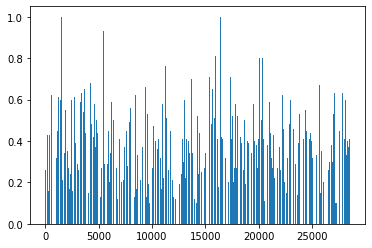

In [229]:
indexes = np.arange(len(Threat['Vec_Risk_Empath'].tolist()))
plt.bar(indexes, Threat['Vec_Risk_Empath'].tolist())
#plt.savefig('YVec_Risk_Empath.eps', format='eps')
plt.savefig('YVec_Risk_Empath.png')

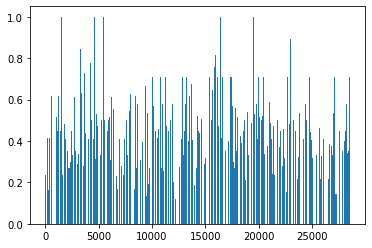

In [230]:
indexes = np.arange(len(Threat['Mat_Risk_Empath'].tolist()))
plt.bar(indexes, Threat['Mat_Risk_Empath'].tolist())
#plt.savefig('YMat_Risk_Empath.eps', format='eps')
plt.savefig('YMat_Risk_Empath.png')

In [231]:
df_users.to_csv('Twitter_users.csv', index=False, header=True)
df_users

,username,tweets,YLabels,TLabels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
0,Abu_Ibn_Taha,hillary emails egyptian military covertly move...,1,1,0.0128,0.45,0.454591,0.93,0.00
1,murasil1,since obama administration authorized record u...,1,0,0.0054,0.44,0.441633,0.93,0.00
2,Suspend_Me_fags,bismillah acc number follow rt jzkthird acc to...,0,1,0.0050,0.49,0.438727,0.95,0.00
3,Abu_Azzzam25,back suspension allahu akbar back kufffar susp...,1,1,0.0056,0.57,0.569653,0.94,0.00
4,Freedom_speech2,exactly hahahaha want fame amp money say defec...,1,1,0.0040,0.47,0.472624,0.96,0.01
...,...,...,...,...,...,...,...,...,...
106,safiyaimback,bi ithnillah innama almuminoona ikhwatun faasl...,1,1,0.0059,0.48,0.480075,0.95,0.01
107,DawlaWitness11,assalamu aleikum back long time assalamu aleik...,1,1,0.0087,0.58,0.579047,0.94,0.00
108,GunsandCoffee70,message truthful syria sheikh abu muhammed al ...,0,1,0.0098,0.56,0.564697,0.96,0.01
109,1Dawlah_III,tour sukar neighborhood mosul relations office...,0,1,0.0072,0.37,0.324785,0.94,0.00


In [232]:
Threat.to_csv('Threats.csv', index=False, header=True)
Threat

,Texts,Labels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
0,europeans want change way life customs makes e...,0,0.0000,0.32,0.408248,0.95,0.01
1,muslims want assimilate properly european soci...,0,0.0000,0.29,0.333333,0.95,0.01
2,ok europe soon rebel like spain drive killed,1,0.0000,0.46,0.455842,0.88,0.00
3,forsee big civil war europe future muslims lea...,0,0.0000,0.28,0.288675,0.94,0.00
4,islam simple humanitarian attractive religion,0,0.2000,0.61,0.617213,0.91,0.00
...,...,...,...,...,...,...,...
28512,yeah monsters gonna kill u right,1,0.1667,0.43,0.416025,0.90,0.00
28513,stupid brainwashed idiot,0,0.0000,0.41,0.707107,0.88,0.00
28514,ever serbia kosovo fucking idiot u know shit,0,0.0000,0.41,0.707107,0.81,0.00
28515,probably u mean monsters fucker watch v jc,0,0.0000,0.52,0.577350,0.94,0.00


### BERT Feature Space

In [119]:
Threat = pd.read_csv('Threats.csv')
df_users = pd.read_csv('Twitter_users.csv')

In [6]:
df_users

,username,tweets,YLabels,TLabels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
0,Abu_Ibn_Taha,hillary emails egyptian military covertly move...,1,1,0.0128,0.45,0.454591,0.99,0.007964
1,murasil1,since obama administration authorized record u...,1,0,0.0054,0.44,0.441633,0.99,0.005848
2,Suspend_Me_fags,bismillah acc number follow rt jzkthird acc to...,0,1,0.0050,0.49,0.438727,0.99,0.010362
3,Abu_Azzzam25,back suspension allahu akbar back kufffar susp...,1,1,0.0056,0.57,0.569653,0.99,0.009968
4,Freedom_speech2,exactly hahahaha want fame amp money say defec...,1,1,0.0040,0.47,0.472624,0.99,0.016783
...,...,...,...,...,...,...,...,...,...
106,safiyaimback,bi ithnillah innama almuminoona ikhwatun faasl...,1,1,0.0059,0.48,0.480075,0.99,0.013150
107,DawlaWitness11,assalamu aleikum back long time assalamu aleik...,1,1,0.0087,0.58,0.579047,0.99,0.007330
108,GunsandCoffee70,message truthful syria sheikh abu muhammed al ...,0,1,0.0098,0.56,0.564697,0.99,0.014205
109,1Dawlah_III,tour sukar neighborhood mosul relations office...,0,1,0.0072,0.37,0.324785,0.99,0.009288


In [7]:
import torch
import torch.nn as nn

import transformers
from transformers import AutoModel, BertTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [8]:
# specify GPU device
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'GeForce GTX 1070'

In [9]:
print("GPU Available: {}".format(torch.cuda.is_available()))
n_gpu = torch.cuda.device_count()
print("Number of GPU Available: {}".format(n_gpu))
print("GPU: {}".format(torch.cuda.get_device_name(0)))

GPU Available: True
Number of GPU Available: 1
GPU: GeForce GTX 1070


In [61]:
def group_words(s, n):
    words = s.split()
    for i in range(0, len(words), n):
        yield ' '.join(words[i:i+n])

def remove_stopwords(texts):
    return [' '.join([word for word in doc.lower().split() if word not in stopwords.words('english')]) for doc in texts]

def Bert_Features(Data, max_seq_len, batch_size = 32):
    device = torch.device("cuda")
    
    # import BERT-base pretrained model
    bert = AutoModel.from_pretrained('bert-base-uncased')
    # Load the BERT tokenizer
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

    bert = bert.to(device)
    
    print('model loaded')
    
    Tokens_Data = tokenizer.batch_encode_plus(Data, max_length = max_seq_len,
             padding=True, truncation=True,return_token_type_ids=False)

    Data_seq = torch.tensor(Tokens_Data['input_ids']).to(device)
    Data_mask = torch.tensor(Tokens_Data['attention_mask']).to(device)

    train_data = TensorDataset(Data_seq, Data_mask)
    train_sampler = SequentialSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    Features = []
    
    print('Data loaded')

    for step, batch in enumerate(train_dataloader):
        batch = [r.to(device) for r in batch]
        sent_id, mask = batch
        _, Feature_Vec = bert(sent_id, mask)

        Feature_Vec = Feature_Vec.detach().cpu().numpy()        
        Features.append(Feature_Vec)
    
    Features  = np.concatenate(Features, axis=0)
    return Features

def BERT_Threat():
    torch.cuda.empty_cache()
    
    batch_size = 32
    max_seq_len = 100

    Texts = remove_stopwords(Threat['Texts'].tolist())
    Features = Bert_Features(Texts, max_seq_len)
    with open('BERT/Vector_Threat_Bert.pkl', 'wb') as handle:
          pickle.dump(Features, handle)
    return Features

def BERT_Tweets():
    torch.cuda.empty_cache()
    
    Indices = []
    Texts = []
    Features = []
    for text in remove_stopwords(df_users['tweets'].tolist()):
        List = list(group_words(text, 300))
        Indices.append(len(List))
        Texts.extend(List)
    print(len(Texts))    
    Vectors = Bert_Features(Texts, max_seq_len = 300)[0]
    i = 0
    for j in Indices:
        Features.append(Vectors[i:i+j])
        i += j

    with open('BERT/Vector_Tweets_Bert.pkl', 'wb') as handle:
          pickle.dump(Features, handle)
    return Features

def BERT_ERG23(Vector=True):
    torch.cuda.empty_cache()
    
    if Vector:
        Texts = remove_stopwords([' '.join(ERG22_Def[factor]).replace('/', ' ').lower() for factor in ERG22_Def.keys()])
        Features = Bert_Features(Texts, max_seq_len = 40)
        with open('BERT/Vector_ERG23_Bert.pkl', 'wb') as handle:
             pickle.dump(Features[0], handle)
    else:
        Indices = [len(ERG22_Def[factor]) for factor in ERG22_Def.keys()]
        
        Texts = []
        Features = []
        for factor in ERG22_Def.keys():
            Texts.extend(remove_stopwords(ERG22_Def[factor]))
        Vectors = Bert_Features(Texts, max_seq_len = 40)[0]
        i = 0
        for j in Indices:
            Features.append(Vectors[i:i+j])
            i += j

        with open('BERT/Matrix_ERG23_Bert.pkl', 'wb') as handle:
             pickle.dump(Features, handle)
    return Features

In [62]:
#Threat_Bert = BERT_Threat()
#Vec_ERG23_Bert = BERT_ERG23(Vector=True)
Mat_ERG23_Bert = BERT_ERG23(Vector=False)

model loaded
Data loaded


In [27]:
torch.cuda.empty_cache()
Features = []
df_isis.dropna(subset = ['username', 'tweets'], inplace=True)
Texts = remove_stopwords(df_isis['tweets'].tolist())
Features = Bert_Features(Texts, max_seq_len = 50).tolist()
with open('BERT/Vector_Tweets_Bert.pkl', 'wb') as handle:
    pickle.dump(Features, handle)

model loaded
Data loaded


In [45]:
df_isis['BERT'] = Features

users = list(set(df_isis['username'].tolist()))
Tweet_Bert = []
for user in users:
    Vecs = np.array(df_isis[df_isis.username == user]['BERT'].tolist())
    Tweet_Bert.append(np.mean(Vecs, axis=0))
with open('BERT/Vector_Tweets_Bert.pkl', 'wb') as handle:
    pickle.dump(Tweet_Bert, handle)
len(Tweet_Bert)

111

### BERT Matching

In [237]:
def ERG23_Bert_vs_Threats_Bert(Vector=True):
    if Vector:
        with open('BERT/Vector_ERG23_Bert.pkl', 'rb') as handle:
             ERG23_Bert = pickle.load(handle)
    else:
        with open('BERT/Matrix_ERG23_Bert.pkl', 'rb') as handle:
             ERG23_Bert = pickle.load(handle)
                
    with open('BERT/Vector_Threat_Bert.pkl', 'rb') as handle:
        Threat_Bert = pickle.load(handle)

    Threat_ERG23_Risk = []
    for TB in Threat_Bert:
        ERG23_Risk = []
        for ERGB in ERG23_Bert:
            if Vector:
                sim = round(1-distance.cosine(TB, ERGB), 2)
            else:
                sim = max([(1-distance.cosine(TB, Vec)) for Vec in ERGB])
            if not np.isnan(sim):
                ERG23_Risk.append(sim)
        Threat_ERG23_Risk.append(max(ERG23_Risk))
        #Threat_ERG23_Risk.append(sum(ERG23_Risk.values()))
        #Threat_ERG23_Risk.append(round(sum(ERG23_Risk)/23, 2))
    return Threat_ERG23_Risk

def ERG23_Bert_vs_tweets_Bert(Vector=True):
    if Vector:
        with open('BERT/Vector_ERG23_Bert.pkl', 'rb') as handle:
             ERG23_Bert = pickle.load(handle)
    else:
        with open('BERT/Matrix_ERG23_Bert.pkl', 'rb') as handle:
             ERG23_Bert = pickle.load(handle)
                
    with open('BERT/Vector_Tweets_Bert.pkl', 'rb') as handle:
        Tweets_Bert = pickle.load(handle)

    Tweets_ERG23_Risk = []
    for TB in Tweets_Bert:
        ERG23_Risk = []
        for ERGB in ERG23_Bert:
            if Vector:
                sim = round(1-distance.cosine(TB, ERGB), 2)
            else:
                sim = max([(1-distance.cosine(TB, Vec)) for Vec in ERGB])
            if not np.isnan(sim):
                ERG23_Risk.append(sim)
        Tweets_ERG23_Risk.append(max(ERG23_Risk))
        #Tweets_ERG23_Risk.append(sum(ERG23_Risk.values()))
        #Tweets_ERG23_Risk.append(round(sum(ERG23_Risk)/23, 2))
    return Tweets_ERG23_Risk

In [238]:
df_users['Vec_Risk_Bert'] = ERG23_Bert_vs_tweets_Bert()
df_users['Mat_Risk_Bert'] = ERG23_Bert_vs_tweets_Bert(Vector=False)

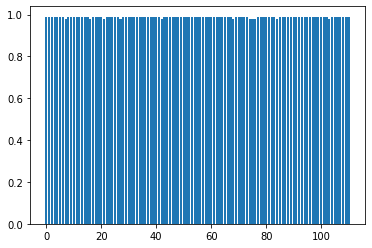

In [239]:
indexes = np.arange(len(df_users['Vec_Risk_Bert'].tolist()))
plt.bar(indexes, df_users['Vec_Risk_Bert'].tolist())
plt.savefig('TVec_Risk_Bert.eps', format='eps')

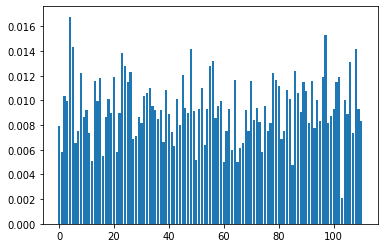

In [240]:
indexes = np.arange(len(df_users['Mat_Risk_Bert'].tolist()))
plt.bar(indexes, df_users['Mat_Risk_Bert'].tolist())
plt.savefig('TMat_Risk_Bert.eps', format='eps')

In [247]:
#df_users.to_csv('Twitter_users.csv', index=False, header=True)
df_users

,username,tweets,YLabels,TLabels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
0,Abu_Ibn_Taha,hillary emails egyptian military covertly move...,1,1,0.0128,0.45,0.454591,0.99,0.007964
1,murasil1,since obama administration authorized record u...,1,0,0.0054,0.44,0.441633,0.99,0.005848
2,Suspend_Me_fags,bismillah acc number follow rt jzkthird acc to...,0,1,0.0050,0.49,0.438727,0.99,0.010362
3,Abu_Azzzam25,back suspension allahu akbar back kufffar susp...,1,1,0.0056,0.57,0.569653,0.99,0.009968
4,Freedom_speech2,exactly hahahaha want fame amp money say defec...,1,1,0.0040,0.47,0.472624,0.99,0.016783
...,...,...,...,...,...,...,...,...,...
106,safiyaimback,bi ithnillah innama almuminoona ikhwatun faasl...,1,1,0.0059,0.48,0.480075,0.99,0.013150
107,DawlaWitness11,assalamu aleikum back long time assalamu aleik...,1,1,0.0087,0.58,0.579047,0.99,0.007330
108,GunsandCoffee70,message truthful syria sheikh abu muhammed al ...,0,1,0.0098,0.56,0.564697,0.99,0.014205
109,1Dawlah_III,tour sukar neighborhood mosul relations office...,0,1,0.0072,0.37,0.324785,0.99,0.009288


In [241]:
Threat['Vec_Risk_Bert'] = ERG23_Bert_vs_Threats_Bert()
Threat['Mat_Risk_Bert'] = ERG23_Bert_vs_Threats_Bert(Vector=False)

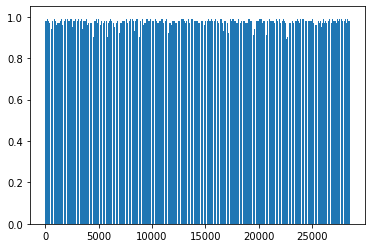

In [242]:
indexes = np.arange(len(Threat['Vec_Risk_Bert'].tolist()))
plt.bar(indexes, Threat['Vec_Risk_Bert'].tolist())
plt.savefig('YVec_Risk_Bert.eps', dpi=500, format='eps')
plt.savefig('YVec_Risk_Bert.png')

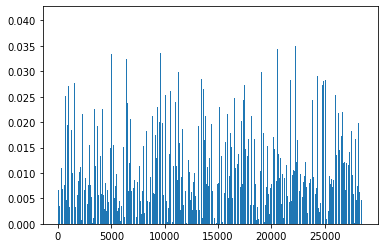

In [243]:
indexes = np.arange(len(Threat['Mat_Risk_Bert'].tolist()))
plt.bar(indexes, Threat['Mat_Risk_Bert'].tolist())
#plt.savefig('YMat_Risk_Bert.eps', format='eps')
plt.savefig('YMat_Risk_Bert.png')

In [245]:
#Threat.to_csv('Threats.csv', index=False, header=True)
Threat

,Texts,Labels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
0,europeans want change way life customs makes e...,0,0.0000,0.32,0.408248,0.98,0.015343
1,muslims want assimilate properly european soci...,0,0.0000,0.29,0.333333,0.98,0.021377
2,ok europe soon rebel like spain drive killed,1,0.0000,0.46,0.455842,0.98,0.001933
3,forsee big civil war europe future muslims lea...,0,0.0000,0.28,0.288675,0.98,0.006280
4,islam simple humanitarian attractive religion,0,0.2000,0.61,0.617213,0.98,0.005913
...,...,...,...,...,...,...,...
28512,yeah monsters gonna kill u right,1,0.1667,0.43,0.416025,0.97,0.002288
28513,stupid brainwashed idiot,0,0.0000,0.41,0.707107,0.98,0.006399
28514,ever serbia kosovo fucking idiot u know shit,0,0.0000,0.41,0.707107,0.97,0.006776
28515,probably u mean monsters fucker watch v jc,0,0.0000,0.52,0.577350,0.98,0.010295


In [256]:
Threat[['keywordRisk','Vec_Risk_Empath','Mat_Risk_Empath','Vec_Risk_Bert','Mat_Risk_Bert']].describe()

,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
count,28517.000000,28517.000000,28517.000000,28517.000000,2.851700e+04
mean,0.047491,0.293196,0.346189,0.976195,1.164626e-02
std,0.105334,0.222844,0.246410,0.017706,8.347861e-03
min,0.000000,0.000000,0.000000,0.480000,8.078085e-07
25%,0.000000,0.100000,0.158114,0.970000,4.972945e-03
50%,0.000000,0.290000,0.374634,0.980000,9.798382e-03
75%,0.058800,0.440000,0.500000,0.990000,1.712555e-02
max,1.000000,1.000000,1.000000,1.000000,4.074016e-02


In [271]:
float(1.164626e-02), pow(10, 3)#1,000,000,000

(0.01164626, 1000)

In [257]:
df_users[['keywordRisk','Vec_Risk_Empath','Mat_Risk_Empath','Vec_Risk_Bert','Mat_Risk_Bert']].describe()

,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
count,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.009674,0.459550,0.452006,0.989009,0.009370
std,0.015587,0.106672,0.110667,0.003002,0.002508
min,0.000000,0.000000,0.000000,0.980000,0.002113
25%,0.004500,0.390000,0.377544,0.990000,0.007639
50%,0.006300,0.470000,0.460714,0.990000,0.009251
75%,0.009450,0.530000,0.526624,0.990000,0.011089
max,0.153800,0.660000,0.657839,0.990000,0.016783


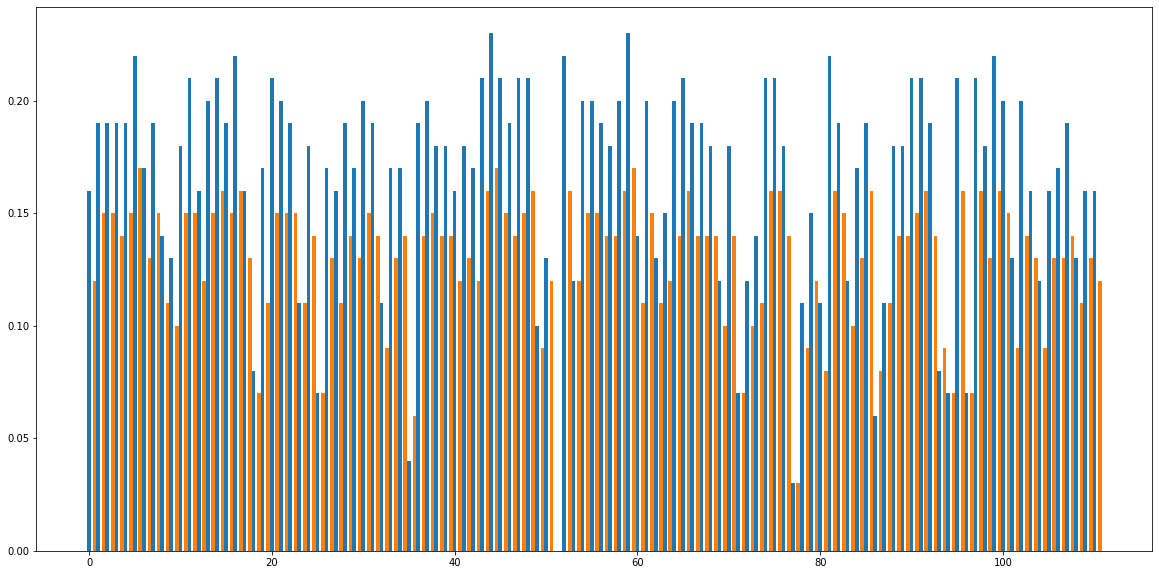

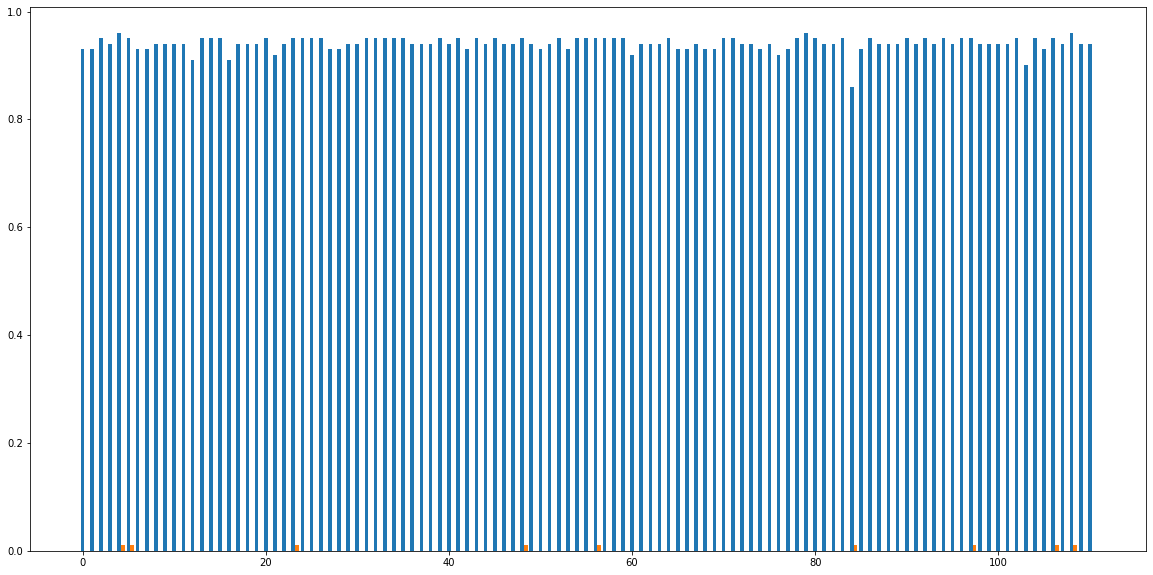

In [186]:
indexes = np.arange(len(df_users['Mat_Risk_Bert'].tolist()))

width = 0.4

# Draw first subplot
plt.figure(figsize=(20, 10))

#plt.subplot(1, 2, 1)
plt.bar(indexes, df_users['Vec_Risk_Empath'], width=width)
plt.bar(indexes + width+0.2, df_users['Mat_Risk_Empath'], width=width)#'Mat_Risk_Empath'

# Draw second subplot
plt.figure(figsize=(20, 10))
# plt.subplot(1, 2, 2)
plt.bar(indexes, df_users['Vec_Risk_Bert'], width=width)
plt.bar(indexes + width, df_users['Mat_Risk_Bert'], width=width)

# Display
plt.show()

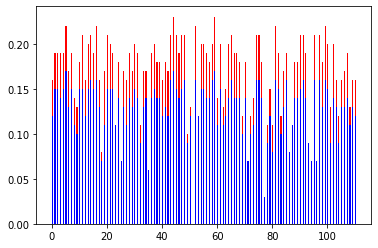

In [180]:
indexes = np.arange(len(df_users['Mat_Risk_Bert'].tolist()))

plt.bar(indexes, df_users['Vec_Risk_Empath'], align='edge', width= 0.4,color='r')
plt.bar(indexes, df_users['Mat_Risk_Empath'], align='edge', width= 0.4,color='b')

plt.show()


## Thresholding

In [5]:
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot

from sklearn.metrics import roc_curve, precision_recall_curve, f1_score

def ROC_Curve(trainy, yhat):
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(trainy, yhat)
    # calculate the g-mean for each threshold
    gmeans = sqrt(tpr * (1-fpr))
    ix = argmax(gmeans)
    #print('ROC Curve G-mean Method: Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    return thresholds[ix]

    # plot the roc curve for the model
#     pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
#     pyplot.plot(fpr, tpr, marker='.', label='Logistic')
#     pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
#     # axis labels
#     pyplot.xlabel('False Positive Rate')
#     pyplot.ylabel('True Positive Rate')
#     pyplot.legend()
#     # show the plot
#     pyplot.show()

def Precision_Recall_Curve(trainy, yhat):
    # calculate pr-curve
    precision, recall, thresholds = precision_recall_curve(trainy, yhat)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = argmax(fscore)
    #print('Precision_Recall_Curve Method: Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    return thresholds[ix]
    # plot the roc curve for the model
#     no_skill = len(trainy[trainy==1]) / len(trainy)
#     pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
#     pyplot.plot(recall, precision, marker='.', label='Logistic')
#     pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
#     # axis labels
#     pyplot.xlabel('Recall')
#     pyplot.ylabel('Precision')
#     pyplot.legend()
#     # show the plot
#     pyplot.show()
    
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

def Optimal_Threshold_Tuning(trainy, yhat):
    # define thresholds
    thresholds = np.arange(0, 1, 0.001)
    # evaluate each threshold
    scores = [f1_score(trainy, to_labels(yhat, t)) for t in thresholds]
    # get best threshold
    ix = argmax(scores)   
    #print('Optimal_Threshold_Tuning Method: Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    return thresholds[ix]

def get_accuracies(name, threshold, labels, yhat):
    preds = [1 if y >= threshold else 0 for y in yhat]
    print(name+' Threshold=%.3f, Accuracy=%.3f' % (threshold, accuracy_score(preds, labels)))

def Quantile_based_discretization(df, Labels, Risk_Scores):
    preds = pd.qcut(df[Risk_Scores], q=[0, 1], labels=False, precision=0)
    print('     Quantile_based_discretization Accuracy=%.3f' % (accuracy_score(preds, df[Labels].tolist())))
    
def Quantile_based_discretization_Threshold(df_train, df_test, Risk_Scores, Labels):
    df0 = df_train[[Risk_Scores, Labels]]
    results, bin_edges = pd.qcut(df0[Risk_Scores], q=[0, .75, 0.9], retbins=True, duplicates='drop')# q=[0, .75, 1], labels=[0,1], retbins=True, duplicates='drop')
    df0 = pd.DataFrame(zip(bin_edges, [0, 1]), columns=['Threshold', 'label'])
    T = df0[df0['label'] == 1]['Threshold'].tolist()[0]
    print('T = ',T)
    
    preds = [1 if Risk >= T else 0 for Risk in df_test[Risk_Scores].tolist()]
    print('     Quantile_based_discretization Accuracy=%.3f' % (accuracy_score(preds, df_test[Labels].tolist())))

In [65]:
Threat = pd.read_csv('Threats.csv')
df_users = pd.read_csv('Twitter_users.csv')

In [68]:
Threat.head(10)

,Texts,Labels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert,Binary
0,europeans want change way life customs makes e...,0,0.0,0.32,0.408248,0.98,0.015343,0.0
1,muslims want assimilate properly european soci...,0,0.0,0.29,0.333333,0.98,0.021377,0.0
2,ok europe soon rebel like spain drive killed,1,0.0,0.46,0.455842,0.98,0.001933,1.0
3,forsee big civil war europe future muslims lea...,0,0.0,0.28,0.288675,0.98,0.006280,0.0
4,islam simple humanitarian attractive religion,0,0.2,0.61,0.617213,0.98,0.005913,NaN
5,welcome islam,0,0.0,0.00,0.000000,0.97,0.012251,0.0
6,please read quran,0,0.0,0.16,0.333333,0.97,0.005008,0.0
7,islam power peacefully conquering souls simpli...,0,0.0,0.47,0.451848,0.99,0.020873,1.0
8,contrast christianity undergoing continual tra...,0,0.0,0.19,0.223607,0.98,0.012013,0.0
9,jean lheureux etude sur lislamisme p,0,0.0,0.00,0.000000,0.97,0.024466,0.0


In [73]:
Threat['Binary'] = pd.qcut(Threat['Vec_Risk_Empath'], q=2, labels=False)#pd.qcut(Threat['Vec_Risk_Empath'], q=[0, .75, 1], labels=False)#, precision=0
print('     Quantile_based_discretization Accuracy=%.3f' % (accuracy_score(Threat['Binary'].tolist(), Threat['Labels'].tolist())))

#Threat['Binary'].value_counts()
#
results, bin_edges = pd.qcut(Threat['Vec_Risk_Empath'], q=[0, .75, 1], labels=False, precision=0, retbins=True)
print('     Quantile_based_discretization Accuracy=%.3f' % (accuracy_score(results, Threat['Labels'].tolist())))

results, bin_edges = pd.qcut(Threat['Vec_Risk_Empath'], q=[0., 1./2, 1], retbins=True)
results_table = pd.DataFrame(zip(bin_edges, [0, 1]),
                            columns=['Threshold', 'Tier'])
results_table

     Quantile_based_discretization Accuracy=0.530
     Quantile_based_discretization Accuracy=0.740


,Threshold,Tier
0,0.00,0
1,0.29,1


In [ ]:
Threat.describe(include='category')

In [74]:
Threat[Threat['Binary'] == 1]

,Texts,Labels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert,Binary
0,europeans want change way life customs makes e...,0,0.0000,0.32,0.408248,0.98,0.015343,1
2,ok europe soon rebel like spain drive killed,1,0.0000,0.46,0.455842,0.98,0.001933,1
4,islam simple humanitarian attractive religion,0,0.2000,0.61,0.617213,0.98,0.005913,1
7,islam power peacefully conquering souls simpli...,0,0.0000,0.47,0.451848,0.99,0.020873,1
10,islam overtaken roman catholicism biggest sing...,0,0.0000,0.81,0.816497,0.99,0.021525,1
...,...,...,...,...,...,...,...,...
28512,yeah monsters gonna kill u right,1,0.1667,0.43,0.416025,0.97,0.002288,1
28513,stupid brainwashed idiot,0,0.0000,0.41,0.707107,0.98,0.006399,1
28514,ever serbia kosovo fucking idiot u know shit,0,0.0000,0.41,0.707107,0.97,0.006776,1
28515,probably u mean monsters fucker watch v jc,0,0.0000,0.52,0.577350,0.98,0.010295,1


In [50]:
T = 0.29
Threat_train, Threat_test = train_test_split(Threat, test_size=0.2)

preds = [1 if Risk > T else 0 for Risk in Threat_test['Vec_Risk_Empath'].tolist()]
print('     Quantile_based_discretization Accuracy=%.3f' % (accuracy_score(preds, Threat_test['Labels'].tolist())))

     Quantile_based_discretization Accuracy=0.543


## Threat Accuracies:

In [247]:
Threat_train, Threat_test = train_test_split(Threat, test_size=0.2)

def Method_Performances(df_train, df_test, Risk_Scores, Labels):
    
#     print('The Risk Score used:', Risk_Scores)
#     threshold = ROC_Curve(df_train[Labels].tolist(), df_train[Risk_Scores].tolist())
#     get_accuracies('     ROC Curve G-mean', threshold, df_test[Labels].tolist(), df_test[Risk_Scores].tolist())

#     threshold = Precision_Recall_Curve(df_train[Labels], df_train[Risk_Scores].tolist())
#     get_accuracies('     Precision Recall Curve', threshold, df_test[Labels].tolist(), df_test[Risk_Scores].tolist())

#     threshold = Optimal_Threshold_Tuning(df_train[Labels].tolist(), df_train[Risk_Scores].tolist())
#     get_accuracies('     Optimal Threshold Tuning', threshold, df_test[Labels].tolist(), df_test[Risk_Scores].tolist())
    
    #Quantile_based_discretization(df_train.append(df_test), Labels, Risk_Scores)
    Quantile_based_discretization_Threshold(df_train, df_test, Risk_Scores, Labels)
    print('___________________________')
    
Method_Performances(Threat_train, Threat_test, 'keywordRisk', 'Labels')
Method_Performances(Threat_train, Threat_test, 'Vec_Risk_Empath', 'Labels')
Method_Performances(Threat_train, Threat_test, 'Mat_Risk_Empath', 'Labels')
Method_Performances(Threat_train, Threat_test, 'Vec_Risk_Bert', 'Labels')
Method_Performances(Threat_train, Threat_test, 'Mat_Risk_Bert', 'Labels')

T =  0.0625
     Quantile_based_discretization Accuracy=0.762
___________________________
T =  0.44
     Quantile_based_discretization Accuracy=0.739
___________________________
T =  0.5000000000000001
     Quantile_based_discretization Accuracy=0.720
___________________________
T =  0.99
     Quantile_based_discretization Accuracy=0.710
___________________________
T =  0.017086302861571312
     Quantile_based_discretization Accuracy=0.725
___________________________


## Twitter Accuracies:

In [236]:
Twitter_train, Twitter_tes
t = train_test_split(df_users, test_size=0.2)
  
Method_Performances(Twitter_train, Twitter_test, 'keywordRisk', 'YLabels')
Method_Performances(Twitter_train, Twitter_test, 'Vec_Risk_Empath', 'YLabels')
Method_Performances(Twitter_train, Twitter_test, 'Mat_Risk_Empath', 'YLabels')
Method_Performances(Twitter_train, Twitter_test, 'Vec_Risk_Bert', 'YLabels')
Method_Performances(Twitter_train, Twitter_test, 'Mat_Risk_Bert', 'YLabels')

T =  0.011125
     Quantile_based_discretization Accuracy=0.609
___________________________
T =  0.52
     Quantile_based_discretization Accuracy=0.478
___________________________
T =  0.5231467052186491
     Quantile_based_discretization Accuracy=0.478
___________________________
T =  0.99
     Quantile_based_discretization Accuracy=0.348
___________________________
T =  0.011232734547799217
     Quantile_based_discretization Accuracy=0.565
___________________________


In [241]:
Method_Performances(Twitter_train, Twitter_test, 'keywordRisk', 'TLabels')
Method_Performances(Twitter_train, Twitter_test, 'Vec_Risk_Empath', 'TLabels')
Method_Performances(Twitter_train, Twitter_test, 'Mat_Risk_Empath', 'TLabels')
Method_Performances(Twitter_train, Twitter_test, 'Vec_Risk_Bert', 'TLabels')
Method_Performances(Twitter_train, Twitter_test, 'Mat_Risk_Bert', 'TLabels')

T =  0.00938
     Quantile_based_discretization Accuracy=0.130
___________________________
T =  0.5
     Quantile_based_discretization Accuracy=0.435
___________________________
T =  0.503226271838089
     Quantile_based_discretization Accuracy=0.391
___________________________
T =  0.99
     Quantile_based_discretization Accuracy=0.826
___________________________
T =  0.010607181449182001
     Quantile_based_discretization Accuracy=0.348
___________________________


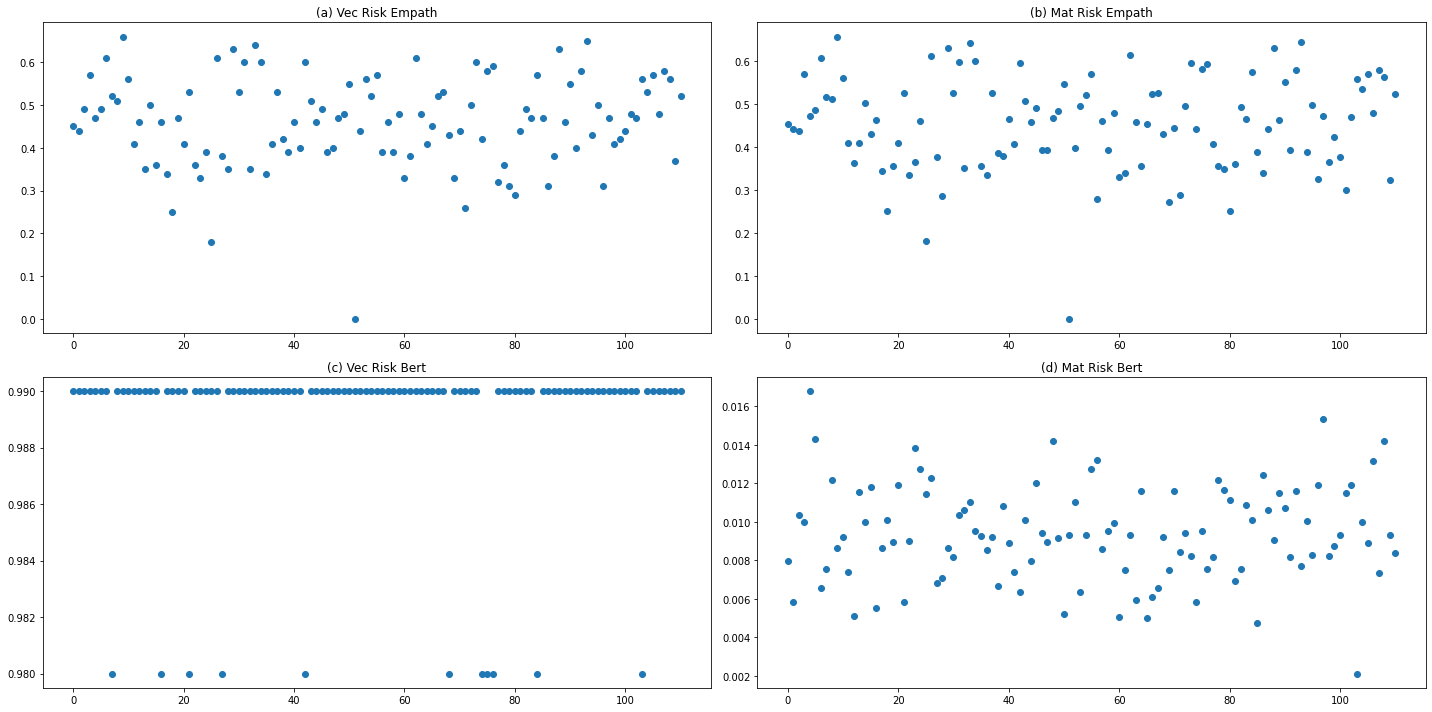

In [34]:
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(len(df_users['Mat_Risk_Bert'].tolist()))

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2,figsize=(20, 10))
  
# For Sine Function
#axis[0, 0].bar(X, df_users['Vec_Risk_Empath'].tolist())
axis[0, 0].scatter(X, df_users['Vec_Risk_Empath'].tolist())
axis[0, 0].set_title("(a) Vec Risk Empath")
  
# For Cosine Function
#axis[0, 1].bar(X, df_users['Mat_Risk_Empath'].tolist())
axis[0, 1].scatter(X, df_users['Mat_Risk_Empath'].tolist())
axis[0, 1].set_title("(b) Mat Risk Empath")
  
# For Tangent Function
#axis[1, 0].bar(X, df_users['Vec_Risk_Bert'].tolist())
axis[1, 0].scatter(X, df_users['Vec_Risk_Bert'].tolist())
axis[1, 0].set_title("(c) Vec Risk Bert")
  
# For Tanh Function
#axis[1, 1].bar(X, df_users['Mat_Risk_Bert'].tolist())
axis[1, 1].scatter(X, df_users['Mat_Risk_Bert'].tolist())
axis[1, 1].set_title("(d) Mat Risk Bert")

plt.tight_layout()

# Combine all the operations and display
#plt.show()

plt.savefig('Twitter_Risk_Scores.eps', dpi=700, format='eps')

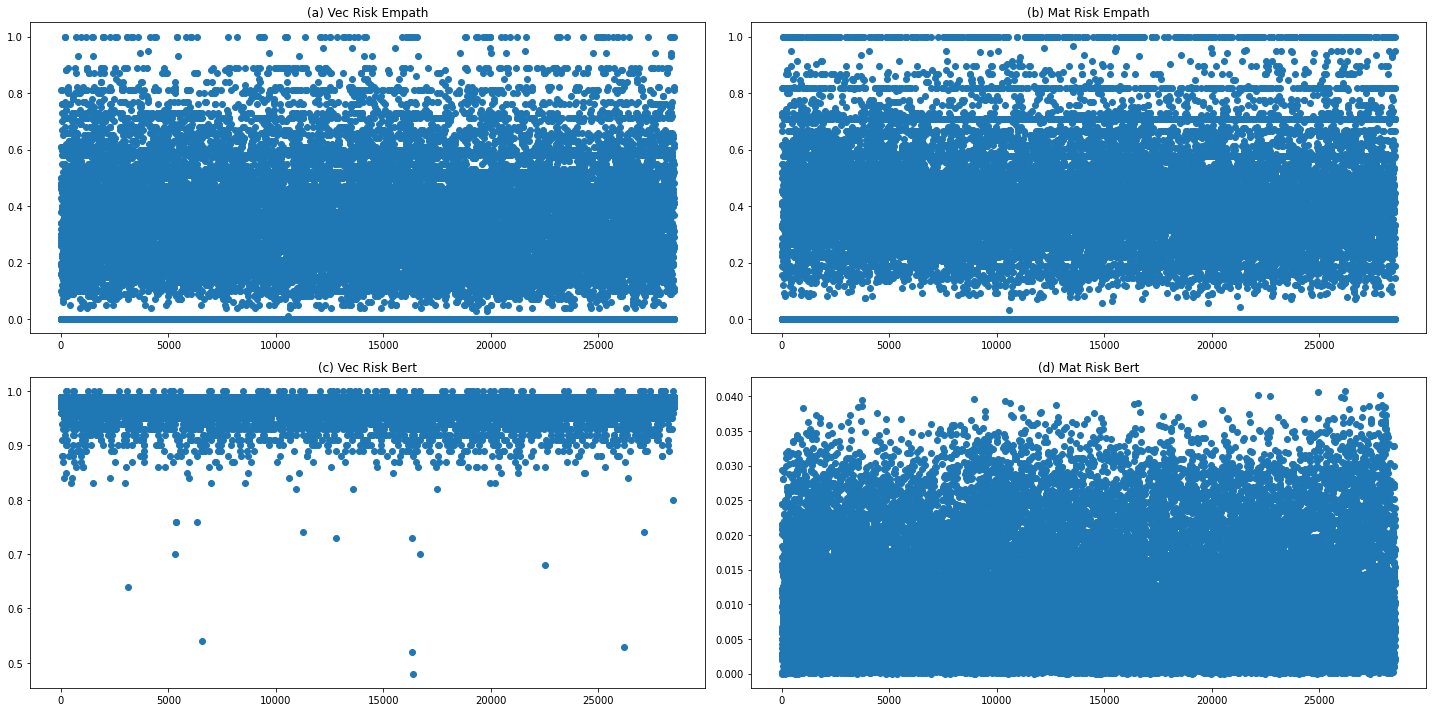

In [32]:
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(len(Threat['Mat_Risk_Bert'].tolist()))

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2,figsize=(20, 10))
  
# For Sine Function
#axis[0, 0].bar(X, Threat['Vec_Risk_Empath'].tolist())
axis[0, 0].scatter(X, Threat['Vec_Risk_Empath'].tolist())
axis[0, 0].set_title("(a) Vec Risk Empath")
  
# For Cosine Function
#axis[0, 1].bar(X, Threat['Mat_Risk_Empath'].tolist())
axis[0, 1].scatter(X, Threat['Mat_Risk_Empath'].tolist())
axis[0, 1].set_title("(b) Mat Risk Empath")
  
# For Tangent Function
#axis[1, 0].bar(X, Threat['Vec_Risk_Bert'].tolist())
axis[1, 0].scatter(X, Threat['Vec_Risk_Bert'].tolist())
axis[1, 0].set_title("(c) Vec Risk Bert")
  
# For Tanh Function
#axis[1, 1].bar(X, Threat['Mat_Risk_Bert'].tolist())
axis[1, 1].scatter(X, Threat['Mat_Risk_Bert'].tolist())
axis[1, 1].set_title("(d) Mat Risk Bert")

plt.tight_layout()

# Combine all the operations and display
#plt.show()

plt.savefig('Threat_Risk_Scores.png')

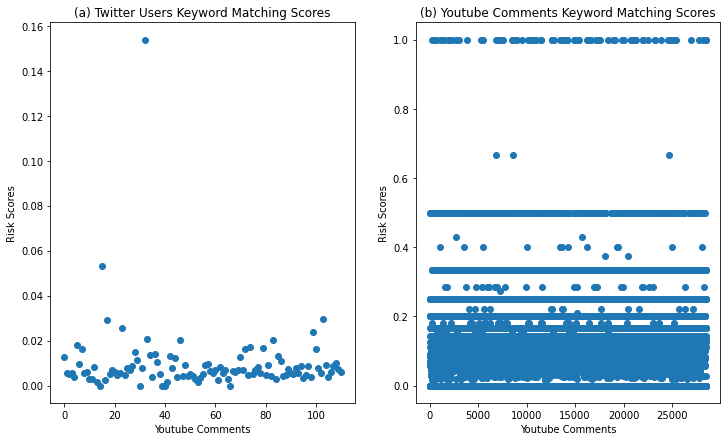

In [31]:
figure, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 7))

X = np.arange(len(df_users['keywordRisk'].tolist()))
#ax1.bar(X, df_users['keywordRisk'].tolist())
ax1.scatter(X, df_users['keywordRisk'].tolist())
ax1.set_title("(a) Twitter Users Keyword Matching Scores")
ax1.set_xlabel('Youtube Comments')
ax1.set_ylabel('Risk Scores')

X = np.arange(len(Threat['keywordRisk'].tolist()))
#ax2.bar(X, Threat['keywordRisk'].tolist())
ax2.scatter(X, Threat['keywordRisk'].tolist())
ax2.set_title("(b) Youtube Comments Keyword Matching Scores")
ax2.set_xlabel('Youtube Comments')
ax2.set_ylabel('Risk Scores')

plt.savefig('Keywords_Risk_Scores.png')

In [14]:
Threat = pd.read_csv('Threats.csv')
df_users = pd.read_csv('Twitter_users.csv')

In [17]:
Threat

,Texts,Labels,keywordRisk,Vec_Risk_Empath,Mat_Risk_Empath,Vec_Risk_Bert,Mat_Risk_Bert
0,europeans want change way life customs makes e...,0,0.0000,0.32,0.408248,0.98,0.015343
1,muslims want assimilate properly european soci...,0,0.0000,0.29,0.333333,0.98,0.021377
2,ok europe soon rebel like spain drive killed,1,0.0000,0.46,0.455842,0.98,0.001933
3,forsee big civil war europe future muslims lea...,0,0.0000,0.28,0.288675,0.98,0.006280
4,islam simple humanitarian attractive religion,0,0.2000,0.61,0.617213,0.98,0.005913
...,...,...,...,...,...,...,...
28512,yeah monsters gonna kill u right,1,0.1667,0.43,0.416025,0.97,0.002288
28513,stupid brainwashed idiot,0,0.0000,0.41,0.707107,0.98,0.006399
28514,ever serbia kosovo fucking idiot u know shit,0,0.0000,0.41,0.707107,0.97,0.006776
28515,probably u mean monsters fucker watch v jc,0,0.0000,0.52,0.577350,0.98,0.010295


<AxesSubplot:ylabel='Density'>

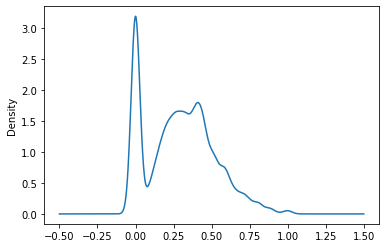

In [18]:
Threat['Vec_Risk_Empath'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

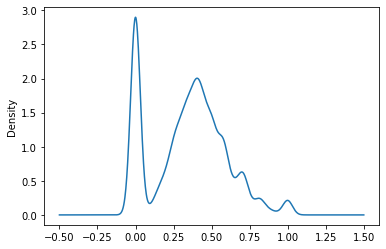

In [19]:
Threat['Mat_Risk_Empath'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

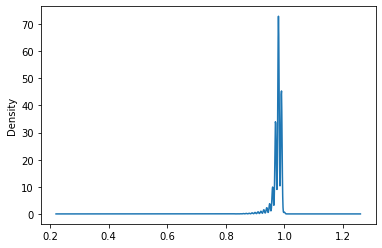

In [20]:
Threat['Vec_Risk_Bert'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

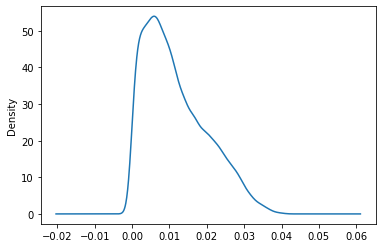

In [21]:
Threat['Mat_Risk_Bert'].plot(kind='kde')

In [31]:
Threat['Vec_Risk_Empath'].corr(Threat['Mat_Risk_Empath']), Threat['Vec_Risk_Empath'].corr(Threat['Mat_Risk_Bert']), Threat['Vec_Risk_Bert'].corr(Threat['Mat_Risk_Bert'])

(0.8749958637284343, 0.11141427467632178, 0.3394658707698143)